In [1]:
import pandas as pd
import numpy as np

In [2]:
ls

DOXO_BAIC_MDA231_540.xls                 mda-mb-doxo_baic_06_10_620.xls
DOXO_BAIC_MDA231_620.xls                 mda-mb-lyco_baic_doxo_11_10_540.xls
mda-mb-231_lyco_baic_doxo_13_10_540.xls  mda-mb-lyco_baic_doxo_11_10_620.xls
mda-mb-231_lyco_baic_doxo_13_10_620.xls  MTT.ipynb
mda-mb-doxo_baic_06_10_540.xls


In [3]:
data_540= pd.read_excel('mda-mb-231_lyco_baic_doxo_13_10_540.xls',sheet_name='List ; Plates 1 - 1', header=0)
data_620= pd.read_excel('mda-mb-231_lyco_baic_doxo_13_10_620.xls',sheet_name='List ; Plates 1 - 1')

WARNING *** file size (20729) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (20731) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
data_540.head()

,Plate,Repeat,Well,Type,Time,Absorbance @540 (A)
0,1,1,A01,M,00:00:16.430000,1.970078
1,1,1,A02,M,00:00:16.750000,2.045007
2,1,1,A03,M,00:00:17.070000,1.993139
3,1,1,A04,M,00:00:17.390000,1.947140
4,1,1,A05,M,00:00:17.710000,1.825711


In [5]:
data_620.head()

,Plate,Repeat,Well,Type,Time,Absorbance @620 (A)
0,1,1,A01,M,00:00:13.430000,0.656798
1,1,1,A02,M,00:00:13.750000,0.808821
2,1,1,A03,M,00:00:14.070000,0.669583
3,1,1,A04,M,00:00:14.390000,0.660793
4,1,1,A05,M,00:00:14.710000,0.620000


In [6]:
Data=pd.concat([data_540['Absorbance @540 (A)'], data_620['Absorbance @620 (A)']], axis=1)

In [7]:
Data['Difference']=Data['Absorbance @540 (A)']-data_620['Absorbance @620 (A)']
Data.head()

,Absorbance @540 (A),Absorbance @620 (A),Difference
0,1.970078,0.656798,1.313280
1,2.045007,0.808821,1.236187
2,1.993139,0.669583,1.323555
3,1.947140,0.660793,1.286347
4,1.825711,0.620000,1.205710


In [8]:
Data=Data[Data['Difference']>0.1]


In [9]:
Data['Mean Difference']=np.nan

def reject_outliers_2(data, m=2):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

for i in range (3,96,3):
    data_tmp=Data.iloc[i-3:i,::]
   # print(data_tmp['Difference'])
    Data.iloc[i-3:i]['Mean Difference']=reject_outliers_2(data_tmp['Difference'],m=2).mean()

/tmp/ipykernel_21965/3583868716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.iloc[i-3:i]['Mean Difference']=reject_outliers_2(data_tmp['Difference'],m=2).mean()
/home/maria/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/maria/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
Data.head()

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference
0,1.970078,0.656798,1.313280,1.318418
1,2.045007,0.808821,1.236187,1.318418
2,1.993139,0.669583,1.323555,1.318418
3,1.947140,0.660793,1.286347,1.300985
4,1.825711,0.620000,1.205710,1.300985


In [11]:

df = Data.groupby(Data.index // 3).mean()
df=df[df['Mean Difference']>0.1]
IN=['CTRL_1','LYCO 2,5','LYCO 5','LYCO 10','LYCO 15','CTRL_2','BAIC 40 micr/M','BAIC 80 micr/M','BAIC 160 micr/M','BAIC 320 micr/M','CTRL_3','DOXO 4 micr/M','DOXO 8 micr/M','DOXO 16 micr/M','DOXO 32 micr/M']
df['indices']=IN
df.set_index('indices',inplace=True)

In [12]:
vitality=[]
for i in df.index:
    if 'CTRL' in i:
        ctrl=i
    vit=(df['Mean Difference'][i]*100)/df['Mean Difference'][ctrl]
    vitality.append(vit)
df['Vitalità']=vitality
df.head()

,Absorbance @540 (A),Absorbance @620 (A),Difference,Mean Difference,Vitalità
indices,,,,,
CTRL_1,2.002741,0.711734,1.291007,1.318418,100.000000
"LYCO 2,5",1.907627,0.638400,1.269227,1.300985,98.677733
LYCO 5,1.903235,0.632290,1.270945,1.247067,94.588184
LYCO 10,1.863341,0.610098,1.253243,1.266901,96.092520
LYCO 15,1.683077,0.597604,1.085473,1.108342,84.066044


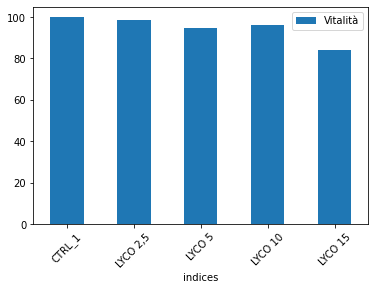

In [13]:
ax_lyco = df.iloc[:5,::].plot.bar(y='Vitalità', rot=45)


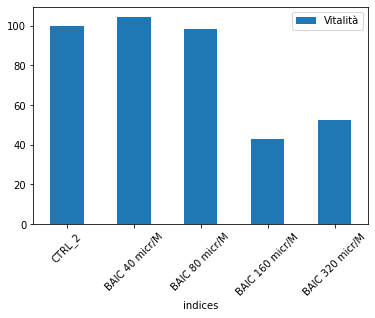

In [14]:
ax_Baic = df.iloc[5:10,::].plot.bar(y='Vitalità', rot=45)

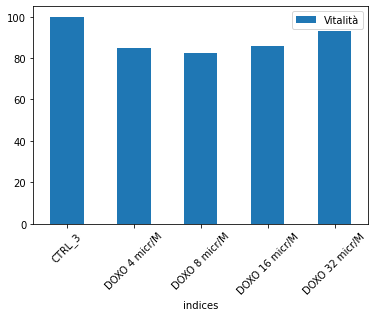

In [15]:
ax_doxo = df.iloc[10:,::].plot.bar(y='Vitalità', rot=45)